# VAIBHAV DAUD

# THE SPARKS FOUNDATION

# #GRIP1PRIL21

# DATA SCIENCE AND BUSINESS ANALYTICS

# PREDICTION USING SUPERVISED MACHINE LEARNING

***TASK-
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.***


***IMPORTING ALL THE NECESSARY LIBRARIES.***

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

***READING THE CSV FILE.***

In [2]:
a1=pd.read_csv('C:/Users/VAIBHAVD/Desktop/iris.csv')
a1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


***SETTING THE 'Id' COLUMN AS INDEX.***

In [3]:
a1.set_index('Id',inplace=True)
a1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


***GETTING THE INFORMATION ABOUT THE TYPE OF VALUES STORED IN THE COLUMNS.***

In [4]:
a1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


***GETTING THE NUMBER OF ROWS AND COLUMNS IN THE DATASET.***

In [5]:
a1.shape

(150, 5)

***GETTING THE DESCRIPTION ABOUT THE DATASET.***

In [6]:
a1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


***DERIVING THE CORRELATION BETWEEN THE VARIABLES AND PLOTTING CORRELATION ON HEAT MAP.***

In [7]:
a1.corr(method='pearson')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

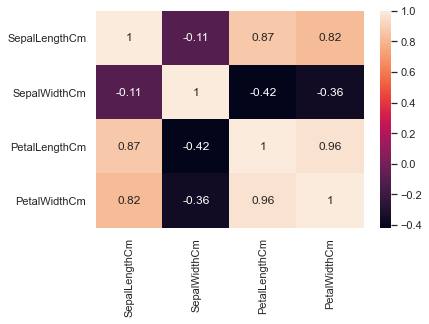

In [8]:
sns.heatmap(a1.corr(method='pearson'),annot=True)

***EXCLUDING THE 'Species' COLUMN AS WE WONT BE REQUIRING IT FOR FURTHER ANALYSIS.***

In [9]:
a2=a1[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
a2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


***GETTING THE SUM OF SQUARED ERROR WITH THE HELP OF 'FOR' LOOP FOR DIFFERENT CLUSTERS  AND APPENDING THESE SUM OF SQAURED ERRORS IN A LIST.***

In [10]:
SSE=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(a2)
    SSE.append(km.inertia_)

***THE SUM OF SQUARED ERRORS FOR DIFFERENT NUMBER OF CLUSTERS ARE AS FOLLOWS.***

In [11]:
SSE

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.95701115711987,
 34.607365934065925,
 30.301149144736108,
 27.912841136933256]

***PLOTTING A GRAPH BETWEEN NUMBER OF CLUSTERS AND SUM OF SQUARED ERRORS.***

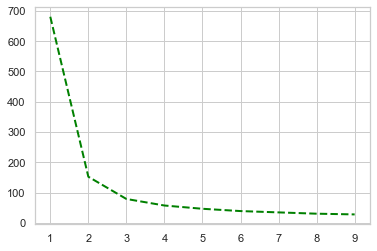

In [12]:
plt.plot(range(1,10),SSE,linewidth=2,linestyle='--',color='green')

***BY ELBOW METHOD, WE CAN SEE THAT THE ELBOW IS ON '3' ON X-AXIS WHICH INDICATES THAT THE OPTIMUM NUMBER OF CLUSTERS MUST BE '3'.***

***USING KMeans WITH 3 NUMBER OF CLUSTERS AND FITTING  KMeans ALGORITHM ON OUR DATASET.***

In [13]:
km1=KMeans(n_clusters=3)
km1.fit(a2)

KMeans(n_clusters=3)

***THE PREDICTED CLUSTERS ARE AS FOLLOWS:***

In [14]:
km1.predict(a2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

***ADDING CLUSTER COLUMN IN THE ORIGINAL DATASET FOR CLEAR AND EASY UNDERSTANDING.***

In [15]:
a3=km1.predict(a2)
a1['cluster']= a3
a1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,2
147,6.3,2.5,5.0,1.9,Iris-virginica,1
148,6.5,3.0,5.2,2.0,Iris-virginica,2


***CATEGORISING DATA WITH RESPECT TO CLUSTERS AND SAVING IT IN INDIVIDUAL VARIABLES WHERE EACH VARIABLE CONTAINS DATA OF A SINGLE CLUSTER.***

In [16]:
c0=a1.loc[a1['cluster']==0]
c1=a1.loc[a1['cluster']==1]
c2=a1.loc[a1['cluster']==2]

***GETTING THE CENTROIDS OF EACH CLUSTER.***

In [17]:
a4=km1.cluster_centers_
a4

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

***MAKING A DATAFRAME CONTAINING ALL THE CENTROIDS.***

In [18]:
a5=pd.DataFrame(a4,columns=['column1','column2','column3','column4'])
a5

,column1,column2,column3,column4
0,5.006000,3.418000,1.464000,0.244000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


***PLOTTING CLUSTERS WITH THEIR CENTROIDS FOR SEPAL LENGTH AND SEPAL WIDTH.***

***LIKEWISE WE CAN TAKE ANY TWO COLUMNS ON X AXIS AND Y AXIS RESPECTIVELY AND SEE THE GRAPH WITH THEIR CLUSTERS AND CENTROIDS.***

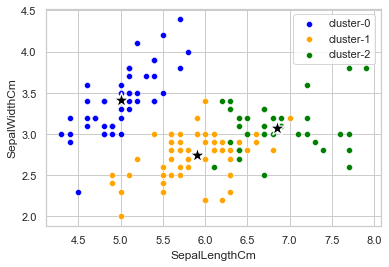

In [19]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=c0,color='blue',label='cluster-0')
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=c1,color='orange',label='cluster-1')
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=c2,color='green',label='cluster-2')
sns.scatterplot(x='column1',y='column2',data=a5,s=250,color='black',marker='*')
plt.legend()

***KMeans MODEL HAS DIVIDED DATA IN THREE CLUSTERS SUCCESSFULLY***

***NOW PLOTTING THE ORIGINAL SPECIES COLUMN OF THE DATASET.***

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

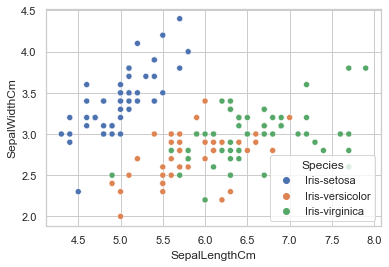

In [20]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=a1)

***NOW WE NEED TO KNOW WHAT IS THE ACCURACY OF OUR MODEL. SO COMPARING THE CLUSTER CLASSIFICATION OF DATA WITH THE GIVEN SPECIES CLASSIFICATION OF THE DATA.***

In [21]:
accuracy_score(a1['Species'].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2]),a1['cluster'])

0.8933333333333333

***THE ACCURACY IS 89.33 % , WHICH IS PRETTY GOOD AND DECENT.***

# THATS ALL FROM MY SIDE, THANKYOU.